In [101]:
import seaborn as sns

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2023-04-21 02:16:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  11.6MB/s    in 0.6s    

2023-04-21 02:16:11 (11.6 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [3]:
!unzip /content/OnlineNewsPopularity.zip

Archive:  /content/OnlineNewsPopularity.zip
   creating: OnlineNewsPopularity/
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.names  
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.csv  


In [4]:
df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
df.drop('url', axis = 1, inplace=True)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
list(df.columns)

[' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_neg

# EDA

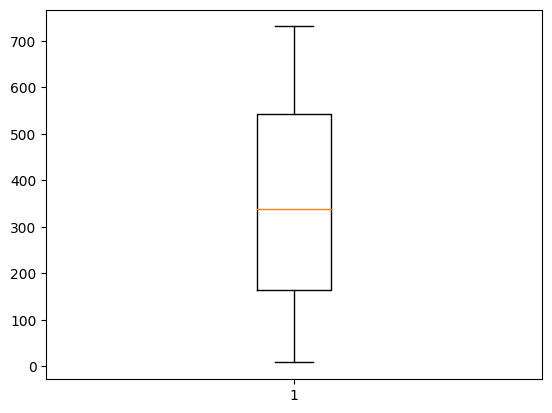

In [9]:
plt.boxplot(list(df[' timedelta']))
plt.show()

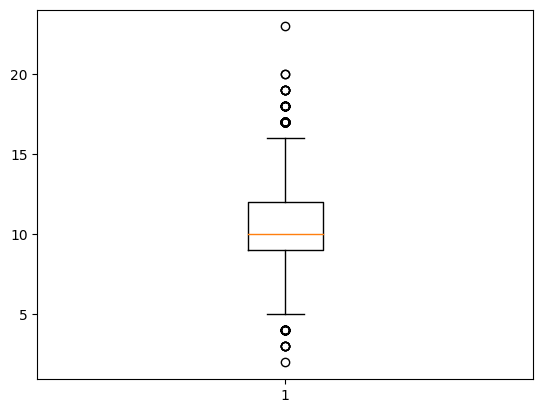

In [10]:
plt.boxplot(list(df[' n_tokens_title']))
plt.show()

<Axes: >

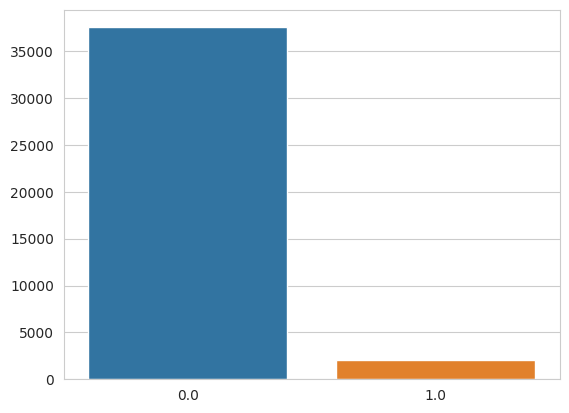

In [ ]:
sns.barplot(x=df[' data_channel_is_lifestyle'].value_counts().index, y = df[' data_channel_is_lifestyle'].value_counts().values)

<Axes: >

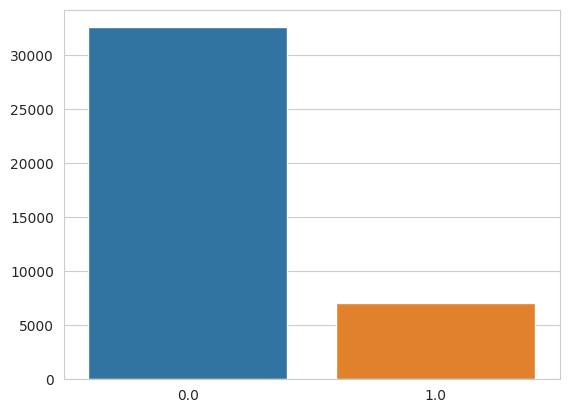

In [ ]:
sns.barplot(x=df[' data_channel_is_entertainment'].value_counts().index, y = df[' data_channel_is_entertainment'].value_counts().values)

<Axes: >

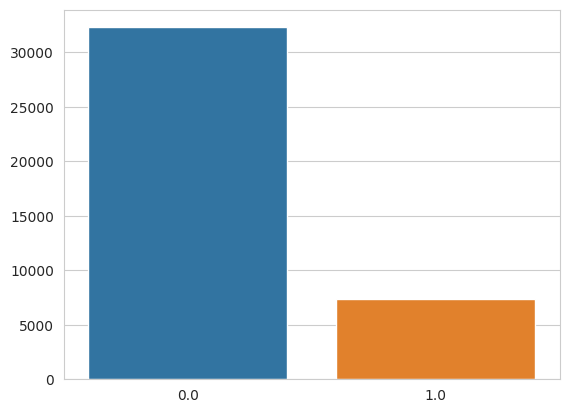

In [ ]:
sns.barplot(x=df[' data_channel_is_tech'].value_counts().index, y = df[' data_channel_is_tech'].value_counts().values)

<Axes: >

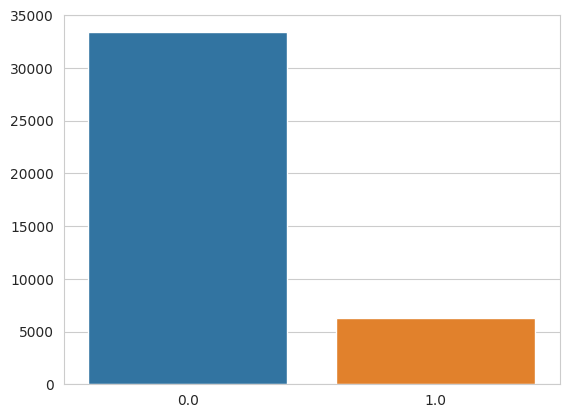

In [ ]:
sns.barplot(x=df[' data_channel_is_bus'].value_counts().index, y = df[' data_channel_is_bus'].value_counts().values)

<Axes: >

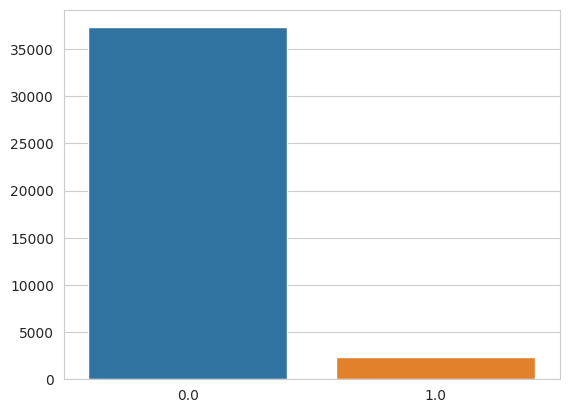

In [ ]:
sns.barplot(x=df[' data_channel_is_socmed'].value_counts().index, y = df[' data_channel_is_socmed'].value_counts().values)

<Axes: >

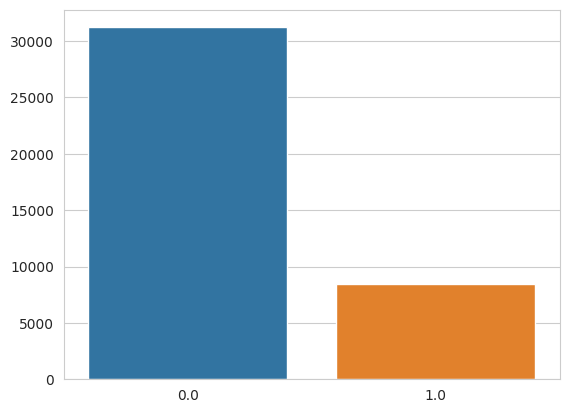

In [ ]:
sns.barplot(x=df[' data_channel_is_world'].value_counts().index, y = df[' data_channel_is_world'].value_counts().values)

<Axes: >

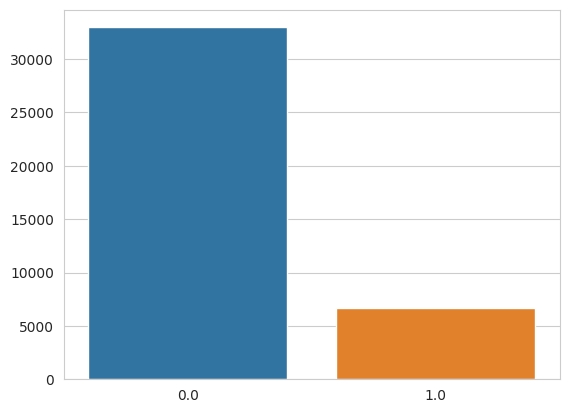

In [ ]:
sns.barplot(x=df[' weekday_is_monday'].value_counts().index, y = df[' weekday_is_monday'].value_counts().values)

<Axes: >

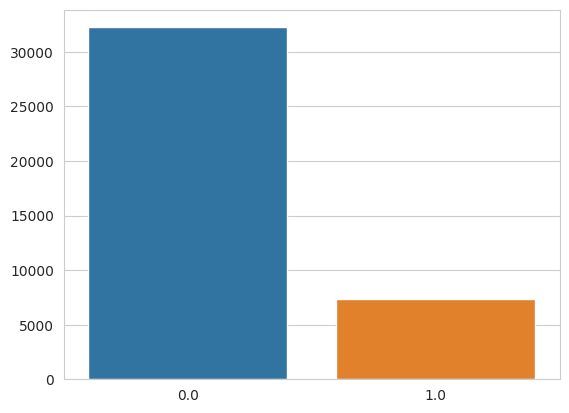

In [ ]:
sns.barplot(x=df[' weekday_is_tuesday'].value_counts().index, y = df[' weekday_is_tuesday'].value_counts().values)

<Axes: >

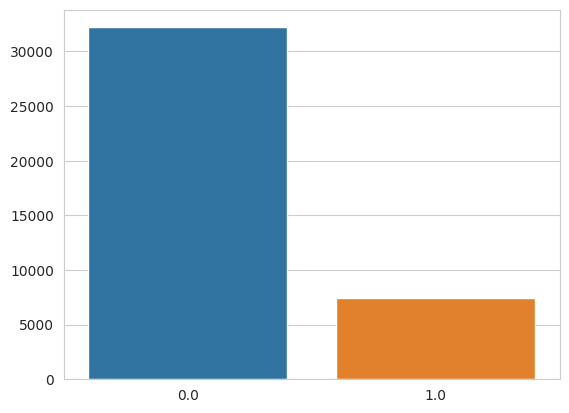

In [ ]:
sns.barplot(x=df[' weekday_is_wednesday'].value_counts().index, y = df[' weekday_is_wednesday'].value_counts().values)

<Axes: >

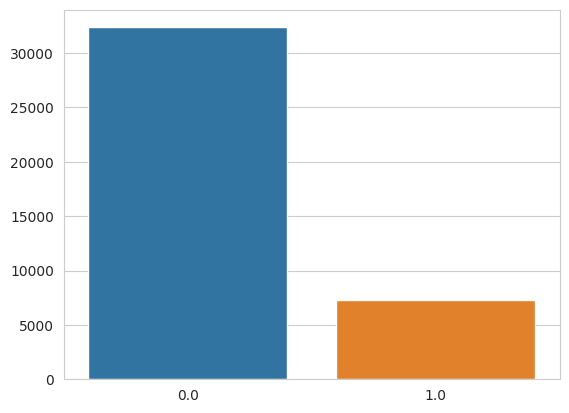

In [ ]:
sns.barplot(x=df[' weekday_is_thursday'].value_counts().index, y = df[' weekday_is_thursday'].value_counts().values)

<Axes: >

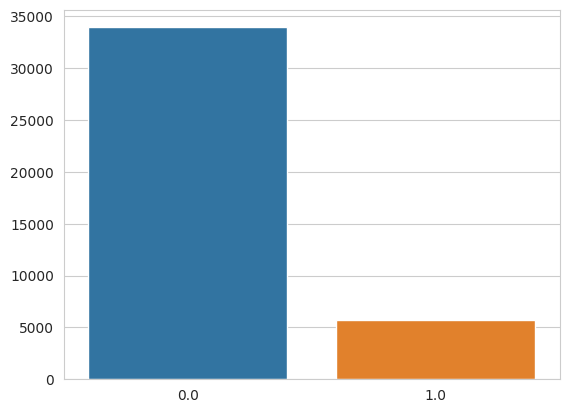

In [ ]:
sns.barplot(x=df[' weekday_is_friday'].value_counts().index, y = df[' weekday_is_friday'].value_counts().values)

<Axes: >

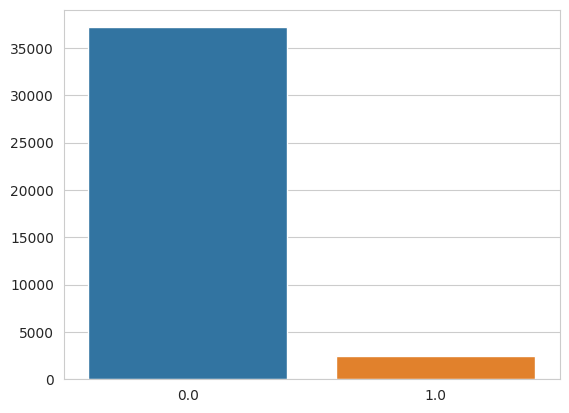

In [ ]:
sns.barplot(x=df[' weekday_is_saturday'].value_counts().index, y = df[' weekday_is_saturday'].value_counts().values)

<Axes: >

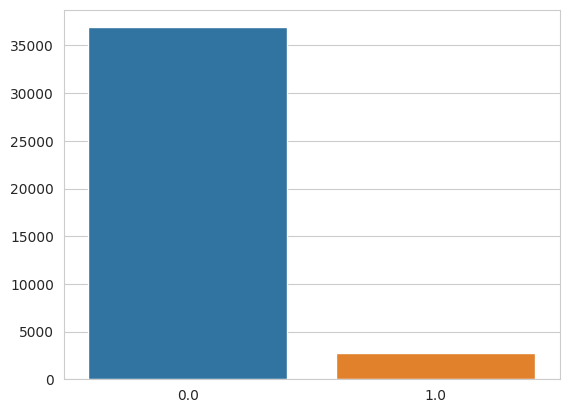

In [ ]:
sns.barplot(x=df[' weekday_is_sunday'].value_counts().index, y = df[' weekday_is_sunday'].value_counts().values)

<Axes: >

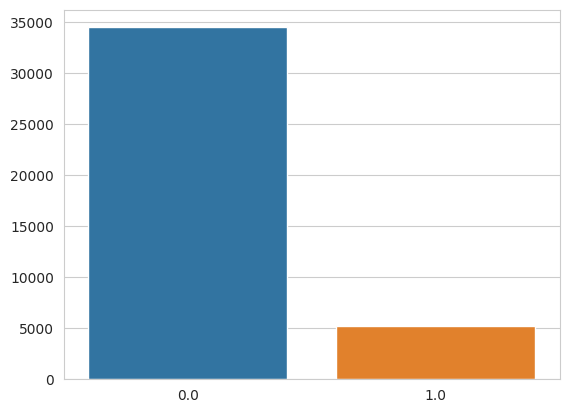

In [ ]:
sns.barplot(x=df[' is_weekend'].value_counts().index, y = df[' is_weekend'].value_counts().values)

<Axes: >

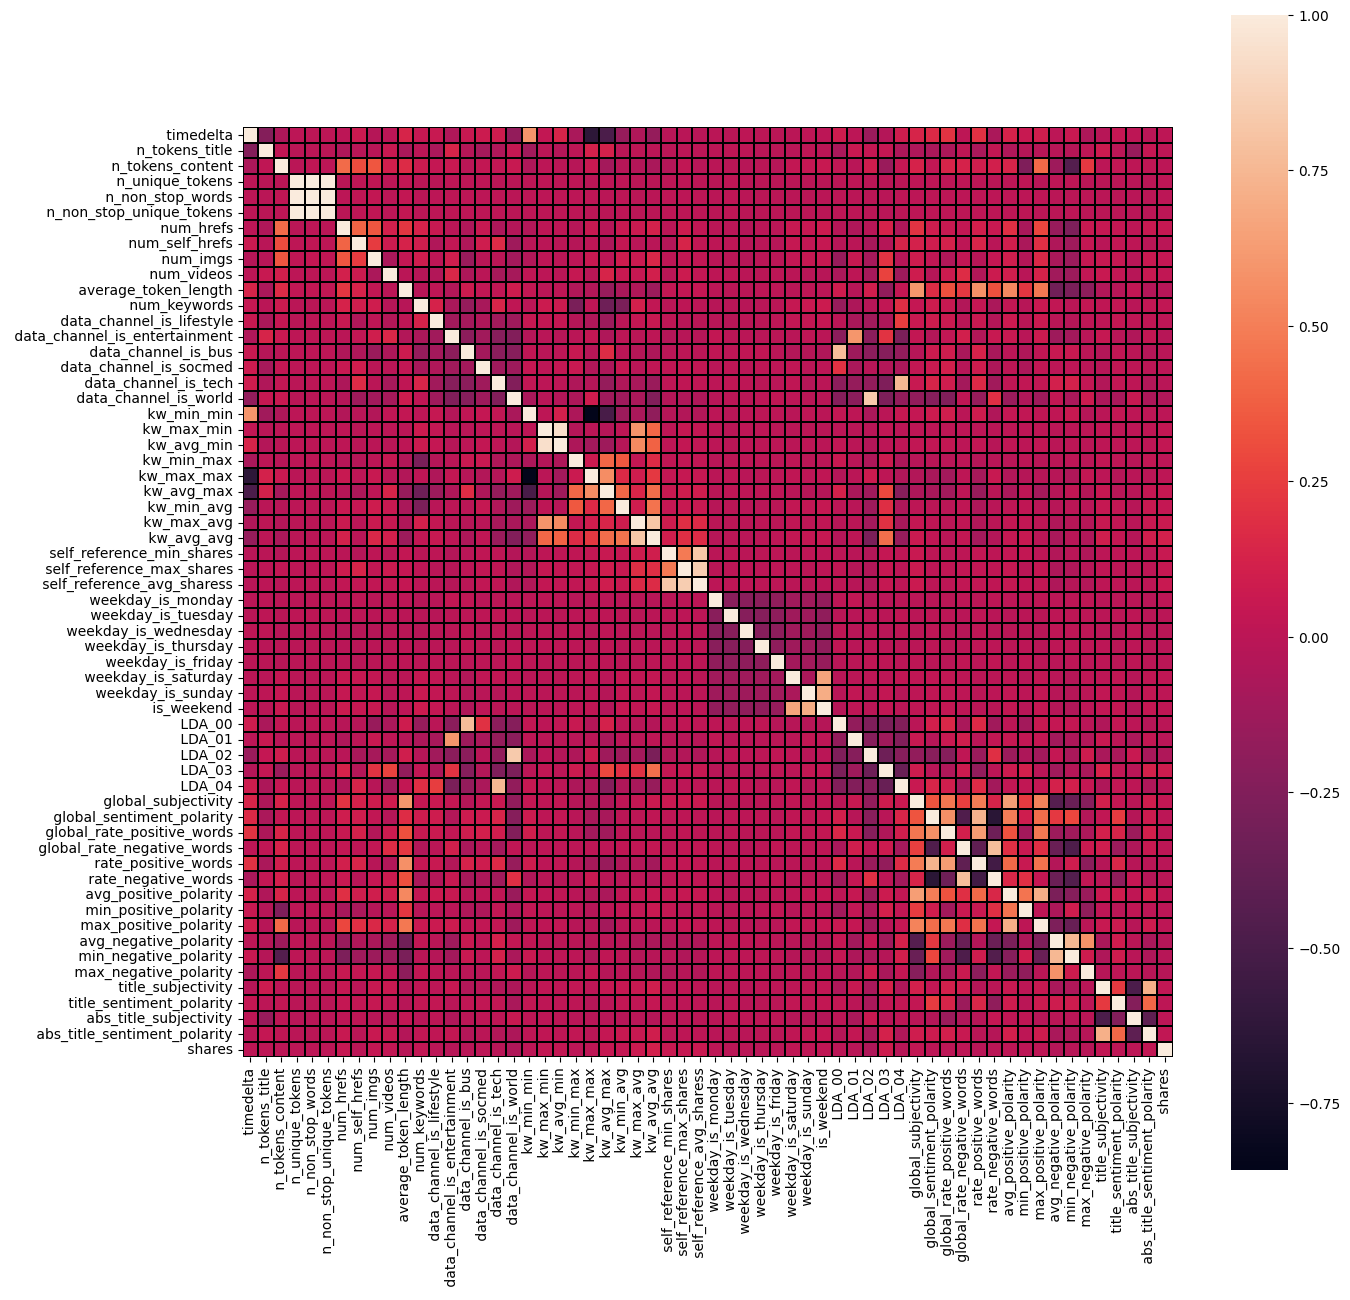

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),linewidths=0.25, square=True, linecolor='black')

Index([' shares', ' kw_avg_avg', ' LDA_03', ' kw_max_avg',
       ' self_reference_avg_sharess', ' self_reference_min_shares',
       ' self_reference_max_shares', ' num_hrefs', ' kw_avg_max',
       ' kw_min_avg', ' num_imgs'],
      dtype='object')


<Axes: >

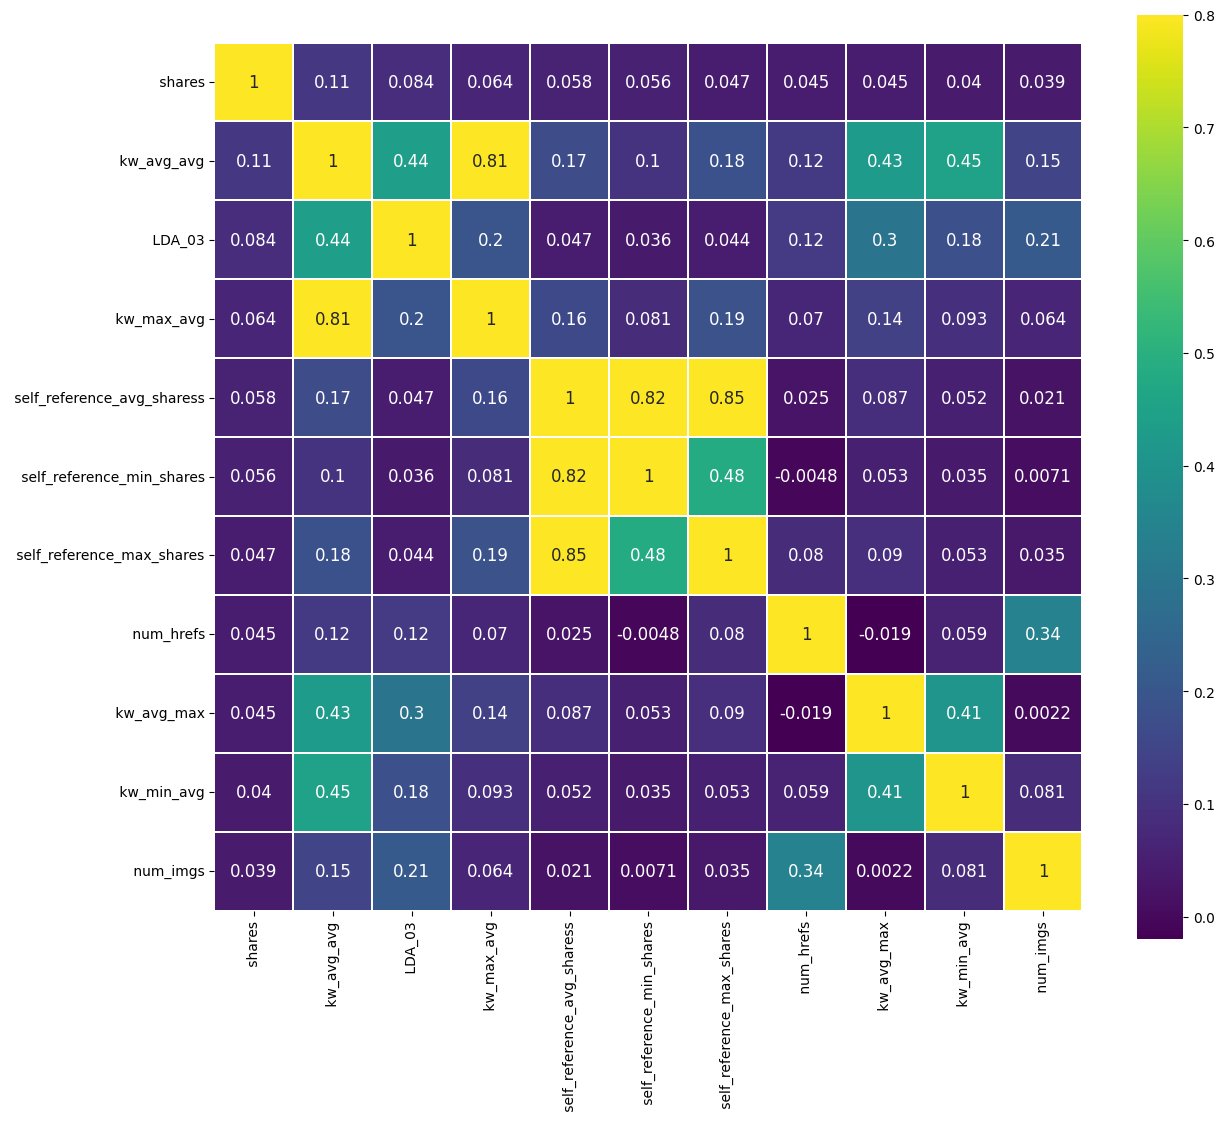

In [ ]:
k= 11
cols = df.corr().nlargest(k,' shares')[' shares'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


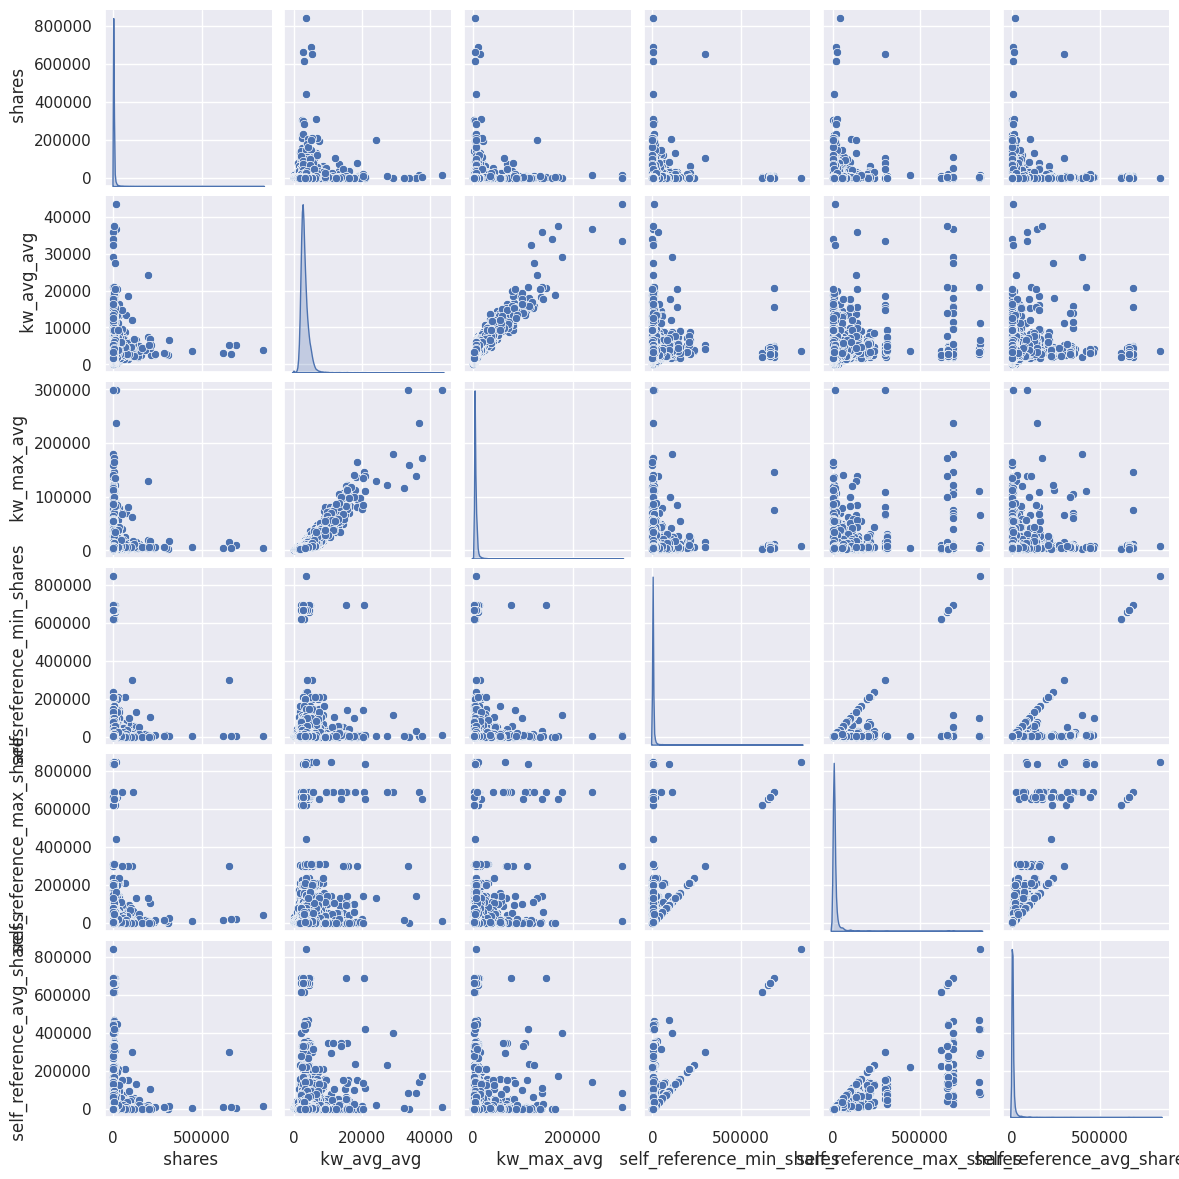

In [ ]:
sns.set()
columns = [' shares',' kw_avg_avg',' kw_max_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess']
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Index([' average_token_length', ' global_subjectivity', ' rate_positive_words',
       ' avg_positive_polarity', ' max_positive_polarity',
       ' global_rate_positive_words', ' rate_negative_words',
       ' global_rate_negative_words', ' num_hrefs', ' min_positive_polarity',
       ' global_sentiment_polarity'],
      dtype='object')


<Axes: >

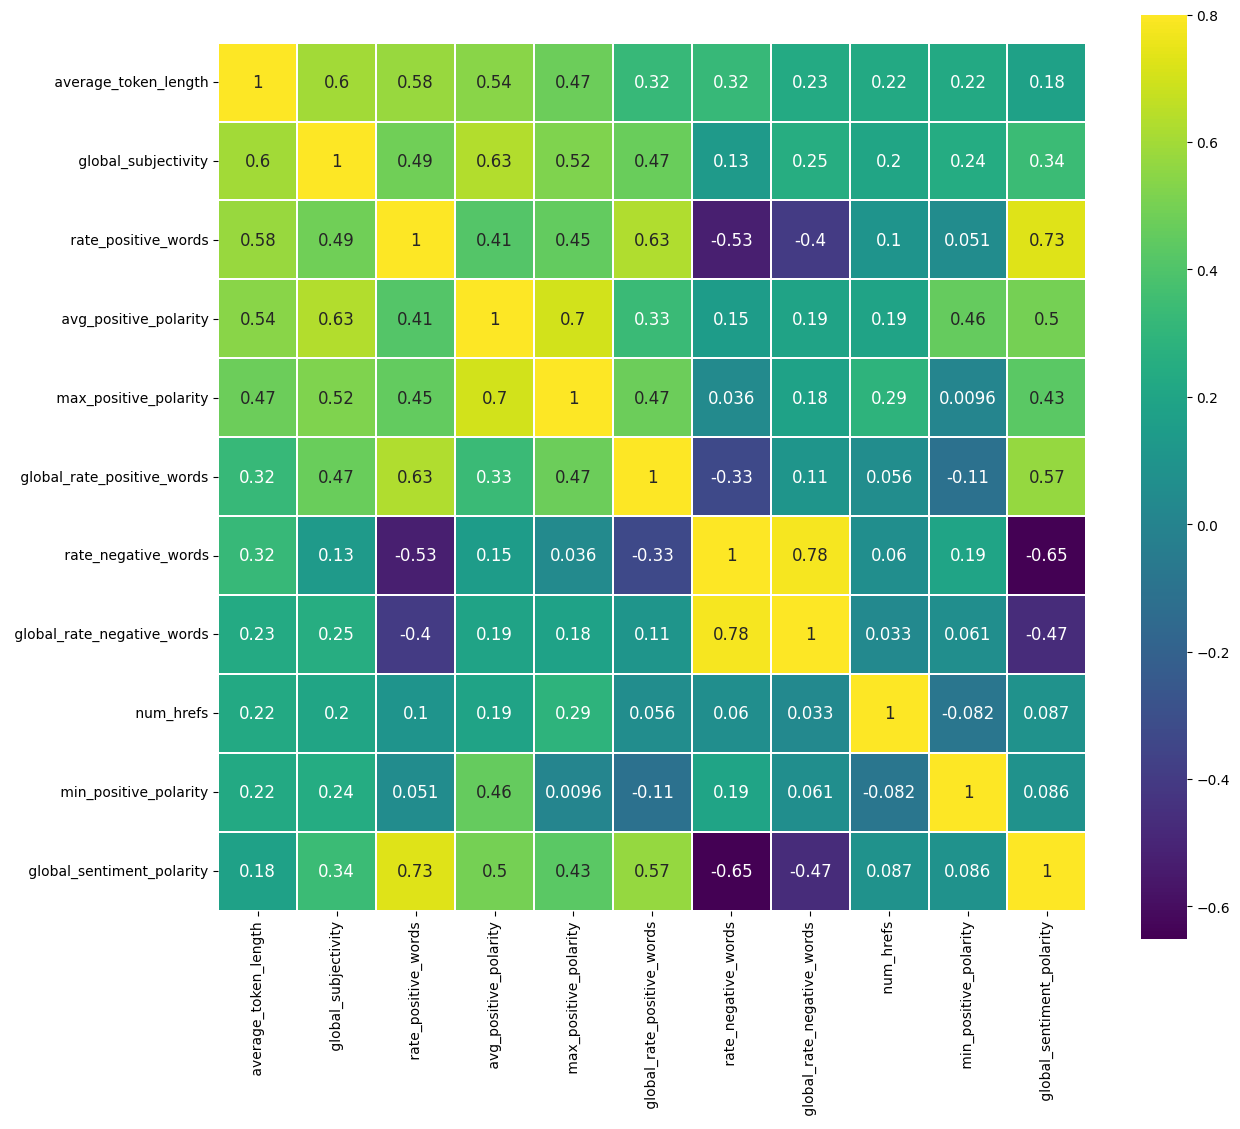

In [ ]:
k= 11
cols = df.corr().nlargest(k,' average_token_length')[' average_token_length'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [11]:
import random

random.seed(42)

X = df.drop(' shares', axis = 1)
y = df[' shares'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

r_reg = Ridge(alpha=0.01)
r_reg.fit(X_train, y_train) 

pred_train_r_reg= r_reg.predict(X_train)
print('Train:')
print('MSE :', mean_squared_error(y_train,pred_train_r_reg))
print('r2_score :', r2_score(y_train, pred_train_r_reg))

print('\n')


pred_test_r_reg= r_reg.predict(X_test)
print('Test:')
print('MSE :', mean_squared_error(y_test,pred_test_r_reg))
print('r2_score :', r2_score(y_test, pred_test_r_reg))

Train:
MSE : 135698509.2465892
r2_score : 0.022407927872480138


Test:
MSE : 117482256.6781689
r2_score : 0.02643183379125924


# Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

las = Lasso(max_iter=10000)
las.fit(X_train, y_train) 

pred_train_las= las.predict(X_train)
print('Train:')
print('MSE :', mean_squared_error(y_train,pred_train_las))
print('r2_score :', r2_score(y_train, pred_train_las))

print('\n')

pred_test_las= las.predict(X_test)
print('Test:')
print('MSE :', mean_squared_error(y_test,pred_test_las))
print('r2_score :', r2_score(y_test, pred_test_las))

Train:
MSE : 135709191.29112104
r2_score : 0.022330972848387476


Test:
MSE : 117510766.7790381
r2_score : 0.026195572355647623


# MinMaxScaler effect on Ridge and Lasso Regression

In [15]:
df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.drop('url', axis = 1, inplace=True)

import random
random.seed(42)

X = df.drop(' shares', axis = 1)
y = df[' shares']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

Mms = MinMaxScaler()
X_train = Mms.fit_transform(X_train)
X_test = Mms.transform(X_test)

In [17]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)
print('Train:')
print('MSE :', mean_squared_error(y_train,pred_train_rr))
print('r2_score :', r2_score(y_train, pred_train_rr))

print('\n')

pred_test_rr= rr.predict(X_test)
print('Test:')
print('MSE :', mean_squared_error(y_test,pred_test_rr))
print('r2_score :', r2_score(y_test, pred_test_rr))

Train:
MSE : 135708667.86617345
r2_score : 0.022334743678899538


Test:
MSE : 117518381.82184738
r2_score : 0.026132466968731838


In [18]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.01, max_iter=10000)
las.fit(X_train, y_train) 

pred_train_las= las.predict(X_train)
print('Train:')
print('MSE :', mean_squared_error(y_train,pred_train_las))
print('r2_score :', r2_score(y_train, pred_train_las))

print('\n')

pred_test_las= las.predict(X_test)
print('Test:')
print('MSE :', mean_squared_error(y_test,pred_test_las))
print('r2_score :', r2_score(y_test, pred_test_las))

Train:
MSE : 135708863.67622805
r2_score : 0.022333333034390113


Test:
MSE : 117518147.39023376
r2_score : 0.026134409688957194


# Adding polynomial features

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.drop('url', axis = 1, inplace=True)

X = df.drop([' shares'], axis = 1)
Y = df[' shares'] #target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# check effect on ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
y_train_pred = rr.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Train: MSE = {mse_train:.2f}, r2_score = {r2_train:.2f}")

y_test_pred = rr.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test: MSE = {mse_test:.2f}, r2_score = {r2_test:.2f}")

Train: MSE = 125238015.25, r2_score = 0.10
Test: MSE = 125734135.47, r2_score = -0.04


In [20]:
# check effect on lasso
las = Lasso(alpha=0.01)
las.fit(X_train, y_train)
y_train_pred = las.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set: MSE = {mse_train:.2f}, r2_score = {r2_train:.2f}")

y_test_pred = rr.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Testing set: MSE = {mse_test:.2f}, r2_score = {r2_test:.2f}")

Training set: MSE = 125864175.42, r2_score = 0.09
Testing set: MSE = 125734135.47, r2_score = -0.04


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


#  Forward and Backward Feature selection 

In [47]:
forward_selected = forward_selection(X, y)
print("Features selected by forward selection:", forward_selected)

Features selected by forward selection: [26, 27, 25, 24, 0, 6, 1, 13, 41, 52, 10, 43, 30, 21, 35, 7, 2, 40, 45, 50, 28, 12, 11, 19, 58, 57, 20, 18, 8, 36, 32, 49, 56, 14, 38, 15, 16, 54, 17, 39, 29, 47, 48, 3, 4, 5, 51, 44, 55, 9, 34, 53, 31, 23, 22, 42, 46, 37, 33]


In [48]:
name_feature =[]
for i in forward_selected:
    name_feature.append(df.columns[i])

name_feature

[' kw_avg_avg',
 ' self_reference_min_shares',
 ' kw_max_avg',
 ' kw_min_avg',
 ' avg_negative_polarity',
 ' kw_min_min',
 ' data_channel_is_entertainment',
 ' num_imgs',
 ' average_token_length',
 ' weekday_is_monday',
 ' timedelta',
 ' num_hrefs',
 ' num_self_hrefs',
 ' data_channel_is_lifestyle',
 ' is_weekend',
 ' min_positive_polarity',
 ' kw_min_max',
 ' title_sentiment_polarity',
 ' self_reference_avg_sharess',
 ' data_channel_is_socmed',
 ' global_rate_positive_words',
 ' data_channel_is_world',
 ' data_channel_is_tech',
 ' LDA_04',
 ' num_keywords',
 ' kw_avg_max',
 ' n_non_stop_unique_tokens',
 ' n_non_stop_words',
 ' max_positive_polarity',
 ' weekday_is_tuesday',
 ' kw_avg_min',
 ' LDA_01',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' n_unique_tokens',
 ' weekday_is_friday',
 ' title_subjectivity',
 ' abs_title_sentiment_polarity',
 ' kw_max_min',
 ' avg_positive_polarity',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' min_negati

In [49]:
df_selected = df[name_feature]
df_selected

,kw_avg_avg,self_reference_min_shares,kw_max_avg,kw_min_avg,avg_negative_polarity,kw_min_min,data_channel_is_entertainment,num_imgs,average_token_length,weekday_is_monday,...,LDA_00,global_subjectivity,global_sentiment_polarity,num_videos,self_reference_max_shares,n_tokens_content,LDA_02,LDA_03,data_channel_is_bus,n_tokens_title
0,0.000000,496.0,0.000000,0.000000,-0.350000,0.0,1.0,1.0,4.680365,1.0,...,0.500331,0.521617,0.092562,0.0,496.0,219.0,0.040005,0.041263,0.0,12.0
1,0.000000,0.0,0.000000,0.000000,-0.118750,0.0,0.0,1.0,4.913725,1.0,...,0.799756,0.341246,0.148948,0.0,0.0,255.0,0.050096,0.050101,1.0,9.0
2,0.000000,918.0,0.000000,0.000000,-0.466667,0.0,0.0,1.0,4.393365,1.0,...,0.217792,0.702222,0.323333,0.0,918.0,211.0,0.033351,0.033334,1.0,9.0
3,0.000000,0.0,0.000000,0.000000,-0.369697,0.0,1.0,1.0,4.404896,1.0,...,0.028573,0.429850,0.100705,0.0,0.0,531.0,0.494651,0.028905,0.0,9.0
4,0.000000,545.0,0.000000,0.000000,-0.220192,0.0,0.0,20.0,4.682836,1.0,...,0.028633,0.513502,0.281003,0.0,16000.0,1072.0,0.028575,0.028572,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,3031.115764,11400.0,4004.342857,2514.742857,-0.260000,-1.0,0.0,1.0,4.523121,0.0,...,0.025038,0.482679,0.141964,1.0,48000.0,346.0,0.151701,0.025000,0.0,11.0
39640,3411.660830,2100.0,5470.168651,1664.267857,-0.211111,-1.0,0.0,3.0,4.405488,0.0,...,0.029349,0.564374,0.194249,48.0,2100.0,328.0,0.231866,0.681635,0.0,12.0
39641,4206.439195,1400.0,6880.687034,1753.882353,-0.356439,-1.0,0.0,12.0,5.076923,0.0,...,0.159004,0.510296,0.024609,1.0,1400.0,442.0,0.025207,0.643794,0.0,10.0
39642,1777.895883,452.0,3384.316871,0.000000,-0.205246,-1.0,0.0,1.0,4.975073,0.0,...,0.040004,0.358578,-0.008066,0.0,452.0,682.0,0.839987,0.040002,0.0,6.0


In [54]:
X_forward_selected = df_selected

random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_forward_selected, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# effect on ridge

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print('Train:')
print('MSE :', mean_squared_error(y_train,pred_train_rr))
print('r2_score :', r2_score(y_train, pred_train_rr))

print('\n')

pred_test_rr= rr.predict(X_test)
print('Test:')
print('MSE :', mean_squared_error(y_test,pred_test_rr))
print('r2_score :', r2_score(y_test, pred_test_rr))

Train:
MSE : 135698509.2465892
r2_score : 0.022407927872480138


Test:
MSE : 117482256.67816883
r2_score : 0.026431833791259685


In [61]:
backward_selected = backward_selection(X, y)
print("Features remaining after backward selection:", backward_selected)

Features remaining after backward selection: [26]


In [67]:
back_feature = df.columns[backward_selected]
df_selected = df[back_feature]
df_selected

,kw_avg_avg
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
39639,3031.115764
39640,3411.660830
39641,4206.439195
39642,1777.895883


In [68]:
X_backward_selected = df_selected

random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_backward_selected, y, test_size=0.2, random_state=42)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# effect on ridge

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print('Train:')
print('MSE :', mean_squared_error(y_train,pred_train_rr))
print('r2_score :', r2_score(y_train, pred_train_rr))

print('\n')

pred_test_rr= rr.predict(X_test)
print('Test:')
print('MSE :', mean_squared_error(y_test,pred_test_rr))
print('r2_score :', r2_score(y_test, pred_test_rr))

Train:
MSE : 137227425.5716197
r2_score : 0.011393389197040027


Test:
MSE : 118776338.66929638
r2_score : 0.015707856684851862


# Absolute Error Implementation

In [71]:
def mean_absolute_error(y, pred):
    diff = pred - y
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# effect on ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print('Train:')
print('MAE :', mean_absolute_error(y_train,pred_train_rr))
print('r2_score :', r2_score(y_train, pred_train_rr))

print('\n')

pred_test_rr= rr.predict(X_test)
print('Test:')
print('MAE :', mean_absolute_error(y_test,pred_test_rr))
print('r2_score :', r2_score(y_test, pred_test_rr))

Train:
MAE : 3084.90585925524
r2_score : 0.022407927872480138


Test:
MAE : 3007.7736269352745
r2_score : 0.02643183379125924
